# **Prepare Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
df = pd.read_csv("/content/first inten project.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Before
df.isna().sum()

In [ ]:
# Before
df.duplicated().sum()

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['date of reservation'] = pd.to_datetime(df["date of reservation"], errors = "coerce")

In [ ]:
print("Number of null after = ", df["date of reservation"].isna().sum())
df['date of reservation'].fillna("3/1/2018", inplace=True)

In [ ]:
df["year"] = df['date of reservation'].dt.year
df["month"] = df['date of reservation'].dt.month
df["day"] = df['date of reservation'].dt.day

In [ ]:
x_adult = df["number of adults"].value_counts().index
y_adult = df["number of adults"].value_counts().values
sns.barplot(x = x_adult, y = y_adult, palette= "muted")
plt.title("Number of adult visitors")

In [ ]:
x_child = df["number of children"].value_counts().index
y_child = df["number of children"].value_counts().values
sns.barplot(x = x_child, y = y_child, palette= "muted")
plt.title("Number of children visitors")

In [ ]:
# @title <font color = "cyan" size = 6>Percent of Adults for each Children
# Create the cross-tabulation
crosstab = pd.crosstab(df["number of children"], df["number of adults"], normalize="columns")

# Create a jointplot
joinPlot = sns.jointplot(x="number of adults", y="number of children", data=df, kind="hex", height= 8)

# Plot the heatmap on the joint axis
sns.heatmap(crosstab, annot=True, cmap="cividis", fmt=".3f", cbar=True, ax=joinPlot.ax_joint)


# Set labels and title
joinPlot.ax_joint.set_xlabel('Number of Adults')
joinPlot.ax_joint.set_ylabel('Number of Children')
joinPlot.fig.suptitle('Percent of Adults for each Children', y=1.02)

plt.show()


<font color = "cyan" size =5>1.  Most of Adult Visitors comes without children

---

<font color = "yellow" size =5> 2.Most visitors of children came without Adult with count of 2

---

<font color = "cyan" size =5> 3.Number of visitor children without adult is either one, two, or three and the most was two

---

<font color = "yellow" size =5> 4. When adult = 4 there is no any children

---

<font color = "cyan" size =5> 5.As so small percentage some values shows zero

---

In [ ]:
# @title <font color = "cyan" size = 6>Percent of Children for each Adults

# Create the cross-tabulation
crosstab = pd.crosstab(df["number of children"], df["number of adults"], normalize="index")

# Create a jointplot
joinPlot = sns.jointplot(x="number of adults", y="number of children", data=df, kind="hex", cmap="YlGnBu", height= 8)

# Plot the heatmap on the joint axis
sns.heatmap(crosstab, annot=True, cmap="cividis", fmt=".3f", cbar=True, ax=joinPlot.ax_joint)


# Set labels and title
joinPlot.ax_joint.set_xlabel('Number of Adults')
joinPlot.ax_joint.set_ylabel('Number of Children')
joinPlot.fig.suptitle('Percent of Children for each Adults', y=1.02)

plt.show()


<font color = "yellow" size =5> 1.Most visitors of children came with two adult






In [ ]:
favour_weekend_percent = ((df["number of weekend nights"] != 0) & (df["number of week nights"] == 0)).mean()
print("Percent of bookers who prefer weekend = ",favour_weekend_percent )
favour_weekdays_percent = ((df["number of week nights"] != 0) & (df["number of weekend nights"] == 0)).mean()
print("Percent of bookers who prefer week days = ",favour_weekdays_percent )
favour_both_percent = ((df["number of week nights"] != 0) & (df["number of weekend nights"] != 0)).mean()
print("Percent of bookers who prefer both = ",favour_both_percent )
no_stay_percent = 1-(favour_weekend_percent + favour_weekdays_percent + favour_both_percent)
print("Percent of bookers who don't prefer stay = ", no_stay_percent )

In [ ]:
x = [favour_weekend_percent, favour_both_percent, favour_weekdays_percent, no_stay_percent]
labels = ["weekend", "both", "weekdays", "no_stay"]
plt.pie(x= x, labels = labels, autopct='%1.1f%%', startangle=180 )
plt.title('Types of stay', fontsize=16, weight='bold')
plt.show()

In [ ]:
def percent_canceled(row):
    prev_canceled = row['P-C']
    prev_not_canceled = row['P-not-C']
    total_booking = prev_canceled + prev_not_canceled

    if total_booking > 0:
        # shows old customer (repeated)
        percent_canceled = prev_canceled / total_booking
    else:
        # shows new customer (not repeated)
        percent_canceled = -1

    return percent_canceled



In [ ]:
# Create new features
df["total_stay_night"] = df["number of week nights"] + df["number of weekend nights"]
df["total_visiors"] = df["number of adults"] + df["number of children"]
df["percent_canceled"] = df.apply(percent_canceled, axis=1)
# Drop unnecessary features
df.drop(columns= ["Booking_ID", "date of reservation"], inplace = True)

In [ ]:
sns.scatterplot(data = df, x = "total_stay_night", y = "average price")

<font color="yellow" size=5>1. There are short stays with high costs, and long stays with low costs.</font>

---

<font color="yellow" size=5>2. Zero stay nights correspond to zero cost.</font>

---

In [ ]:
seg_percent = df["market segment type"].value_counts(normalize = True).values
seg_name = df["market segment type"].value_counts().index
plt.pie(data = df, x = seg_percent, labels = seg_name , textprops={'fontsize': 8})
plt.title('Market Segment', fontsize=16, weight='bold')

<font color ="yellow" size = 5> 1. Online : booked by its website or in any online method

<font color ="yellow" size = 5> 2. Offline : booked by its traditional travel agencies

<font color ="yellow" size = 5> 3. Corporate : booked by companies for thier employees

In [ ]:
# Number of free offers of different segs
pd.crosstab(df[df["average price"] ==0]["market segment type"], df[df["average price"] ==0]["year"])

In [ ]:
pd.crosstab(df["market segment type"], df["year"])

In [ ]:
print("percent of free offeres of complementary in 2017 = ", round(130/139, 2))
print("percent of free offeres of complementary in 2018 = ", round(224/252, 2))
print("percent of free offeres of Online in 2017 = ", round(103/2953, 2))
print("percent of free offeres of Online in 2018 = ", round(88/20268, 3))


<font color="yellow" size = 5> Full free offers given for two segments : least reserved complementary and and highest reserved online

In [ ]:
# Grouping the data by room type
grouped = df.groupby("room type")["average price"]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

# First plot
for room_type, color in zip(["Room_Type 1", "Room_Type 2", "Room_Type 4", "Room_Type 3", "Room_Type 5", "Room_Type 6", "Room_Type 7"], ["blue", "red", "cyan", "black", "orange", "fuchsia", "green"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[0])

axes[0].set_title("Room Types ")
axes[0].legend()

# Second subplot: Room_Type 1, 2, 4
for room_type, color in zip(["Room_Type 1", "Room_Type 2", "Room_Type 4"], ["blue", "red", "cyan"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[1])

axes[1].set_title("Room Types 1, 2, 4")
axes[1].legend()

# Third subplot: Room_Type 3, 5, 6, 7
for room_type, color in zip(["Room_Type 3", "Room_Type 5", "Room_Type 6", "Room_Type 7"], ["black", "orange", "fuchsia", "green"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[2])

axes[2].set_title("Room Types 3, 5, 6, 7")
axes[2].legend()



# Show plot
plt.tight_layout()
plt.show()


<font color="yellow" size="5">1. Most needed rooms are type1, type4, and type6 in order.</font><br>
<font color="yellow" size="5">2. Most free offers are with type1, type4, and type7 in order.</font><br>
<font color="yellow" size="5">3. The demand for type3 is very low.</font><br>
<font color="yellow" size="5">4. As shown, the average price of type1 is the least, followed by type2, type3, and so on. This suggests that rooms can be ordered based on price.</font>


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
crosstabPerRoom = pd.crosstab(df["room type"], df["market segment type"], normalize="index")
crosstabPerSeg = pd.crosstab(df["room type"], df["market segment type"], normalize="columns")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstabPerRoom, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, ax = axes[0])
sns.heatmap(crosstabPerSeg, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, ax = axes[1])

# Show the plot
axes[0].set_title('Proportion of Market Segments for Each Room Type')
axes[1].set_title('Proportion of Room Types for Each Market Segment')

plt.show()
plt.tight_layout()

<font color="yellow" size =5> 1 . Online segment prefers all types of room on the top type1 then type4

<font color="yellow" size =5> 2 . High demand of type1 room by all segs

<font color="yellow" size =5> 3 . Room7 booked mostly by online then complementary

In [ ]:
# Group by and calculate the size
grouped = df.groupby(["market segment type", "booking status"]).size().unstack(fill_value=0)

# Plot the grouped bar chart
grouped.plot(kind="bar", figsize=(8, 5), color = ["black", "blue"])

# Add labels and title
plt.title("Booking Status by Market Segment Type")
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.legend(title="Booking Status")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

<font color = "yellow" size = 5>1. No cancellations were observed in the complementary segment, possibly because 94% of it are free

<font color = "yellow" size = 5> 2. The cancellation rate for online and offline bookings is nearly 50%

In [ ]:
#df.groupby(["room type", "total_visiors"]).size()

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
colors = ["blue", "fuchsia", "green", "yellow"]
rooms = df["room type"].unique()
for indx,room in enumerate(rooms):
  meals = df[df["room type"] == room]["type of meal"].unique()
  for meal_type, color in zip(meals, colors[:len(meals)]):
    grouped = df[df["room type"] == room].groupby("type of meal")["average price"]
    sns.histplot(x=grouped.get_group(meal_type), kde=True, label=meal_type, color=color, ax=axes[indx//2, indx%2])

      # Add subplot title and legend
    axes[indx//2, indx%2].set_title(f"Room Type: {room}")
    axes[indx//2, indx%2].legend(title="Meal Types")

# Add overall title and layout adjustments
fig.suptitle("Meal Types by Room Type", fontsize=16)

fig.delaxes(axes[3, 1])  # Remove the last subplot (3rd row, 2nd column)

plt.show()


<font color="yellow" size =5> 1 . In all types of room, the Meal Plan 1 preffered the most at all visitors.

<font color="yellow" size =5> 2 . There is no demand for Meal Plan 3 when booking room types 2, 5, and 6, and very little demand for it in other room types

<font color="yellow" size =5> 3 . Most of free offers got with Meal Plan 1

<font color="yellow" size =5> 4 . In General, average price of Meal plan2 is higher than non-selected plane



In [ ]:
sns.scatterplot(data = df, x = 'repeated', y = 'percent_canceled')

<font color="yellow" size=5> non-repeated visitor is new so percent of cancelation is unknown

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue="booking status", ax = axes[0])
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue='market segment type', ax = axes[1])
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue='room type', ax = axes[2])

<font color="yellow" size =5> 1 . low request of high special requests with lower cancelation

<font color="yellow" size =5> 2 . Some prices are low despite high special requests, and vice versa

In [ ]:
df[df["market segment type"] == "Online"]["special requests"].value_counts()

In [ ]:
canceled = df[df["booking status"] == "Canceled"]
non_canceled = df[df["booking status"] == "Not_Canceled"]

In [ ]:
# Aggregate data for bubble chart
bubble_data = df.groupby(['market segment type', 'special requests']).size().reset_index(name="count")

# Plot bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='market segment type',
    y='special requests',
    size="count",
    hue='special requests',
    data=bubble_data,
    sizes=(50, 500),
    palette="cool"
)

# Customize
plt.title("Bubble Chart of Market Segment vs Special Requests", fontsize=14)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Special Requests", fontsize=12)
plt.legend(title="Special Requests", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


<font color="yellow" size =5> 1 . Aviation segment has no special requests

<font color="yellow" size =5> 2 . Both online and Offline prefer all types of request but 0, 1 are the most

<font color="yellow" size =5> 3 . Low demand on 5th special requests

In [ ]:
car_space = df.groupby(["booking status", 'car parking space']).size().reset_index(name="Count")
sns.barplot(data = car_space, x = "booking status", y = "Count", hue = 'car parking space')

<font color="yellow" size =5> Low demand on car space service

In [ ]:
df[df['car parking space'] == 1]["year"].value_counts()

<font color="yellow" size = 5>  Hotel starts adding car parking space service

<font color="yellow" size = 5>  Less required of visitors




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2017 and 2018
df_2017 = df[df["year"] == 2017]
df_2018 = df[df["year"] == 2018]

# Calculate data for 2017
total_2017 = df_2017["month"].value_counts().sort_index()  # Total counts for each month
free_2017 = df_2017[df_2017["average price"] == 0]["month"].value_counts().reindex(total_2017.index, fill_value=0)  # Free counts

# Calculate data for 2018
total_2018 = df_2018["month"].value_counts().sort_index()  # Total counts for each month
free_2018 = df_2018[df_2018["average price"] == 0]["month"].value_counts().reindex(total_2018.index, fill_value=0)  # Free counts

# Create subplots for 2017 and 2018
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Stacked bar chart for 2017
axes[0].bar(total_2017.index, total_2017, label="Total", color="skyblue")
axes[0].bar(total_2017.index, free_2017, label="Free", color="orange")
axes[0].set_title("2017: Free and Total Counts per Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Count")
axes[0].legend()

# Stacked bar chart for 2018
axes[1].bar(total_2018.index, total_2018, label="Total", color="skyblue")
axes[1].bar(total_2018.index, free_2018, label="Free", color="orange")
axes[1].set_title("2018: Free and Total Counts per Month")
axes[1].set_xlabel("Month")
axes[1].legend()

# Overall adjustments
fig.suptitle("Monthly Analysis: Free vs Total Counts (2017 vs 2018)", fontsize=16)
plt.tight_layout()
plt.show()


<font size= 5 color ="yellow" > 1 . Number of reservation in 2018 is higher than 2017.

<font size= 5 color ="yellow" > 2 . In 2018, the number of reservation is high throughout the year except in the end and beginning of year

<font size= 5 color ="yellow" > 3 . In 2017, the number of reservation is high at 9 and 10

<font size= 5 color ="yellow" > 4 . In 2018, the number of offers is equally throughout the year

In [ ]:
monthly_data = df.groupby(['year', 'month']).size().reset_index(name='reservation_count')

# Plotting the line chart
plt.figure(figsize=(10, 6))

sns.lineplot(data=monthly_data, x='month', y='reservation_count', hue='year', marker='o', linewidth=2)

# Customize the plot
plt.title('Monthly Reservations during Years', fontsize=16, weight='bold', )
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> 1.General Increasing in number of Reservation in 2018 compared with previous years

<font color="yellow" size = 5> 2.Decreasing reservation at the begining and end of year

In [ ]:
# @title <font color = "cyan" size = 5>**Cancelation vs Not-Cancelation During 2017 & 2018**
# Prepare monthly data for plotting
monthly_data = df.groupby([ 'year','month', 'booking status']).size().unstack(fill_value=0).reset_index()

# Renaming columns for clarity
monthly_data.columns = [ 'year','month', 'Canceled', 'Not_Canceled']

# Set the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

def plot_monthly_data(year, ax, plot_title):
  # Plot for uncanceled reservations
  sns.lineplot(
      data=monthly_data[monthly_data["year"] == year],
      x='month',
      y='Not_Canceled',
      marker='o',
      linewidth=2,
      ax = axes[ax],
      label = "Not Canceled"

  )

  # Plot for canceled reservations
  sns.lineplot(
      data=monthly_data[monthly_data["year"] == year],
      x='month',
      y='Canceled',
      linestyle='--',
      marker='s',
      linewidth=2,
      ax = axes[ax],
      label = "Canceled"
  )
  # Customize the plot
  axes[ax].set_title(plot_title, fontsize=16, weight='bold')
  axes[ax].set_xlabel('Month', fontsize=14)
  axes[ax].set_ylabel('Count', fontsize=14)
  axes[ax].set_xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])



plot_monthly_data(2017, 0, 'Cancelation vs Non-cancelation in (2017)')
plot_monthly_data(2018, 1, 'Cancelation vs Non-cancelation in (2018)')



# Improve layout and show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> 1.Number of cancelation (may-July) exceeds Number of non-cancelation

<font color="yellow" size = 5> 2.In the end of both years, non-cancelation excels cancelation in high value

In [ ]:
# @title <font color = "cyan" size = 5>**Cancelation vs Not-Cancelation  Based on your Option**

from ipywidgets import interact, widgets

# Sample data preparation
dialy_data = df.groupby(["month", "year", "day", "booking status"]).size().unstack(fill_value=0).reset_index()

# Renaming columns for clarity
dialy_data.columns = ["month", "year", "day", "Canceled", "Not_Canceled"]

# Function to plot dynamically
def plot_dialy_data(month, year):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filter data based on selected month and year
    filtered_data = dialy_data[(dialy_data["month"] == month) & (dialy_data["year"] == year)]

    # Plot for uncanceled reservations
    sns.lineplot(
        data=filtered_data,
        x='day',
        y='Not_Canceled',
        marker='o',
        linewidth=2,
        label="Not Canceled",
        ax=ax
    )

    # Plot for canceled reservations
    sns.lineplot(
        data=filtered_data,
        x='day',
        y='Canceled',
        linestyle='--',
        marker='s',
        linewidth=2,
        label="Canceled",
        ax=ax
    )

    # Customize the plot
    ax.set_title(f"Daily Reservations for {year} - Month {month}", fontsize=16, weight='bold')
    ax.set_xlabel('Day', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title="Status", fontsize=12)

    plt.tight_layout()
    plt.show()

# Dropdown widgets for filtering
month_widget = widgets.Dropdown(
    options=range(1, 13),
    value=7,
    description='Month:',
    style={'description_width': 'initial'}
)

year_widget = widgets.Dropdown(
    options=dialy_data["year"].unique(),
    value=2017,
    description='Year:',
    style={'description_width': 'initial'}
)

# Interactive plot
interact(plot_dialy_data, month=month_widget, year=year_widget)


<font color="yellow" size = 5> 1. When we drill down, I found that most of reservation canceled in July, 2017 so we notice at the previous figure excedding of Cancelation

<font color="yellow" size = 5> 2. In August, 2017, Number of cancelation become increasing especially at day = 15

<font color="yellow" size = 5> 2. In end of 2017, Number of non-cancelation is so low during month

In [ ]:
df[(df["year"] == 2018) &(df["month"] == 12)]['booking status'].value_counts()

In [ ]:
freeOfferPerMonth = df[df["average price"] == 0].groupby(["year", "month"]).size().reset_index(name = "Free Offer Count")
sns.lineplot(data=freeOfferPerMonth, x='month', y='Free Offer Count', hue='year', marker='o', linewidth=2, palette= "viridis")
plt.title('Number of Free Offers per Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Free Offers', fontsize=14)


<font color="yellow" size = 5> In general, number of free offers given for visiors during year were more in 2017.It is possible due to openning newly so it was trying to make marketings and understand more


<font color="yellow" size = 5> from this figure the free offers can't so high, they were in 20,...,60, so in the previous figure there was high difference bw cancelations & non-cancelations in 2017 not becauase of high free offers

In [ ]:
freeOfferPerMonth = df.groupby(["year", "month",])[ "average price"].mean().reset_index(name = "average price")
sns.lineplot(data=freeOfferPerMonth, x='month', y="average price", hue='year', marker='o', linewidth=2, palette= "viridis")
plt.title('Average price', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average price over years', fontsize=14)


<font color="yellow" size = 5> For marketing purposes they start with low prices in 217 compared with 2018

In [ ]:
# @title  later
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First plot: Number of Reservations per Day (Average Price = 0)
x_day_free = df[df["average price"] == 0]["day"].value_counts().index
y_day_free = df[df["average price"] == 0]["day"].value_counts().values
sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
axes[0].set_title('Number of Reservations per Day (Average Price = 0)', fontsize=12, weight='bold')
axes[0].set_xlabel('Day', fontsize=10, weight='bold')
axes[0].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Second plot: Number of Reservations per Day
x_day = df["day"].value_counts().index
y_day = df["day"].value_counts().values
sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])
axes[1].set_title('Number of Reservations per Day', fontsize=12, weight='bold')
axes[1].set_xlabel('Day', fontsize=10, weight='bold')
axes[1].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
# @title later
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First plot: Number of Reservations per Day (Average Price = 0)
x_day_free = df[df["average price"] == 0]["month"].value_counts().index
y_day_free = df[df["average price"] == 0]["month"].value_counts().values
sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
axes[0].set_title('Number of Reservations per Day (Average Price = 0)', fontsize=12, weight='bold')
axes[0].set_xlabel('Day', fontsize=10, weight='bold')
axes[0].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Second plot: Number of Reservations per Day
x_day = df["month"].value_counts().index
y_day = df["month"].value_counts().values
sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])
axes[1].set_title('Number of Reservations per Day', fontsize=12, weight='bold')
axes[1].set_xlabel('Day', fontsize=10, weight='bold')
axes[1].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
# Group by year and reservation status (canceled or not) and count the occurrences
cancel_counts = df.groupby(['year', 'booking status']).size().unstack(fill_value=0)

# Normalize to percentages (divide by the total reservations for each year)
cancel_percent = cancel_counts.div(cancel_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked barplot
cancel_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=[ 'salmon', 'lightblue'])

# Customize the plot
plt.title('Percentage of Canceled vs. Non-Canceled Reservations by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Reservation Status', labels=[ 'Canceled', 'Non-Canceled'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> Percent of cancelation from total is higher than 2017

In [ ]:
sns.barplot(data = df, x = "market segment type", y = "average price")

In [ ]:
canceled = df[df["booking status"] == "Canceled"]
non_canceled = df[df["booking status"] == "Not_Canceled"]
sns.histplot(non_canceled["average price"], label = "Not Canceled", color = "green", kde=True)
sns.histplot(canceled["average price"], label = "Canceled", color = "red", kde=True)
plt.legend()

<font color = "yellow" size =5> 1.More Avg price means high probability to cancel






In [ ]:
sns.histplot(non_canceled['lead time'], label = "Not Canceled", color = "green", kde=True)
sns.histplot(canceled['lead time'], label = "Canceled", color = "red", kde=True)
plt.legend()

<font color = "yellow" size =5> 1.More Lead Time means high probability to cancel






In [ ]:
pd.crosstab(canceled['repeated'], canceled['market segment type'], normalize = "columns")

In [ ]:
pd.crosstab(non_canceled['repeated'], non_canceled['market segment type'], normalize = "columns")

In [ ]:
#df.drop(columns = ["P-not-C", "P-C", "number of week nights", "number of weekend nights", "number of adults", "number of children"], inplace = True)

<font color="fuchsia" size =6> Detect Ourliers

In [ ]:
['number of adults', 'number of children', 'number of weekend nights',
'number of week nights',
        'lead time', 'P-C',
       'P-not-C', 'average price'
        'total_stay_night', 'total_visiors',
       'percent_canceled']

In [ ]:
# Filter numeric features from the DataFrame
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns

# Set up a figure with subplots for all numeric features
num_features = len(numeric_features)
rows = (num_features + 2) // 3  # Number of rows (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Create a box plot for each numeric feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Box Plot of {feature}", fontsize=12)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].set_xlabel("")

# Hide any unused subplots
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Filter numeric columns
numeric_features = df.select_dtypes(include=["float64", "int64"])

# Create subplots for each feature
num_features = len(numeric_features.columns)
rows = (num_features + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(numeric_features.columns):
    sns.histplot(data=df, x=feature, ax=axes[i], color="blue", alpha=0.5)
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# Hide unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
def get_outliers( column_val):
    # Calculate Q1, Q3, and IQR
    Q1 = column_val.quantile(0.25)
    Q3 = column_val.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [ col_val for col_val in column_val if (col_val < lower_bound) | (col_val > upper_bound)]
    number_of_outliers = len(outliers)

    # Return results
    return number_of_outliers, outliers

# Call the function
result_f1 = get_outliers(df['lead time'])
result_f2 = get_outliers(df['average price'])

print(f"Number of Outliers of lead time = {result_f1[0]/df.shape[0]}")
print(f"Number of Outliers of average price = {result_f2[0]/df.shape[0]}")



In [ ]:
df['lead time'] = df['lead time'].apply(lambda x: np.log1p(x))
df['average price'] = df['average price'].apply(lambda x: np.log1p(x))


In [ ]:
result_f1 = get_outliers(df['lead time'])
result_f2 = get_outliers(df['average price'])
print(f"After, Number of Outliers of lead time = {result_f1[0]/df.shape[0]}")
print(f"After, Number of Outliers of average price = {result_f2[0]/df.shape[0]}")


<font color="fuchsia" size =6> Encoding Features

In [ ]:
cat_cols = df.select_dtypes(exclude=["float64", "int64"]).columns[:-3]

In [ ]:
# Mapping dictionaries
meal_dict = {"Not Selected": 1, 'Meal Plan 1': 2, 'Meal Plan 2': 3, 'Meal Plan 3': 4}
room_dict = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
booking_status_dict = {'Not_Canceled': 0, 'Canceled': 1}

# Apply replacements for meal, room type, and booking status
df['type of meal'] = df['type of meal'].replace(meal_dict)
df['room type'] = df['room type'].replace(room_dict)
df['booking status'] = df['booking status'].replace(booking_status_dict)

# Apply get_dummies for market_segment type
df = pd.concat([df, pd.get_dummies(df['market segment type'], prefix='market_segment')], axis=1)

# Drop the original market_segment column
df.drop('market segment type', axis=1, inplace=True)




In [ ]:
df.head()

<font color="fuchsia" size =6> Scaling Features

In [ ]:
x = df.drop("booking status", axis = 1)
y = df["booking status"]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_array = scaler.fit_transform(x)

# Convert back to DataFrame for better readability
x = pd.DataFrame(scaled_array, columns=x.columns)




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x['constant'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Drop the constant term from the results
vif_data = vif_data[vif_data['Feature'] != 'constant']

print(vif_data)


# **Model**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
# Import libraries
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from xgboost import XGBClassifier  # XGBoost
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [ ]:
# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


# 3. Train Support Vector Machine Classifier (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


# 4. Train Logistic Regression Classifier
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


# 5. Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# --------- K-Nearest Neighbors (KNN) ---------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# ----------- AdaBoost --------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


# ---------- CatBoost Classifier---------
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, cat_features=[], random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)



In [ ]:
# ------ Random Forest ---------
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")

# ------ XGBoost ---------
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost F1-Score: {xgb_f1:.4f}")


# ------- SVM -----------
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1-Score: {svm_f1:.4f}")


# -------- Logistic Regression ------
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression F1-Score: {logreg_f1:.4f}")


# -------- Naive Bayes ---------
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1-Score: {nb_f1:.4f}")

from sklearn.metrics import accuracy_score, f1_score

# --------- AdaBoost ---------
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_f1 = f1_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print(f"AdaBoost F1-Score: {adaboost_f1:.4f}")

# ----------- KNN --------
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN F1-Score: {knn_f1:.4f}")

# ------- CatBoost -------
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
catboost_f1 = f1_score(y_test, catboost_predictions)
print(f"CatBoost Accuracy: {catboost_accuracy:.4f}")
print(f"CatBoost F1-Score: {catboost_f1:.4f}")



Random Forest Accuracy: 0.9026
Random Forest F1-Score: 0.8453


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e75f1ea6700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


SVM Accuracy: 0.8317
SVM F1-Score: 0.7209
Logistic Regression Accuracy: 0.7983
Logistic Regression F1-Score: 0.6668
Naive Bayes Accuracy: 0.4145
Naive Bayes F1-Score: 0.5214
AdaBoost Accuracy: 0.8161
AdaBoost F1-Score: 0.7071
KNN Accuracy: 0.8393
KNN F1-Score: 0.7481
CatBoost Accuracy: 0.8816
CatBoost F1-Score: 0.8099


In [ ]:
import pandas as pd

# Create a dictionary with model names as keys and their corresponding accuracy and F1-score as values
model_metrics = {
    'Model': ['Random Forest', 'XGBoost', 'SVM', 'Logistic Regression', 'Naive Bayes', 'AdaBoost', 'KNN', 'CatBoost'],
    'Accuracy': [0.9026, 0.8910, 0.8317, 0.7983, 0.4145, 0.8161, 0.8393, 0.8816],
    'F1-Score': [0.8453, 0.8271, 0.7209, 0.6668, 0.5214, 0.7071, 0.7481, 0.8099]
}

# Convert the dictionary into a pandas DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display the DataFrame
df_metrics.sort_values(by = ["Accuracy"], ascending = False)


,Model,Accuracy,F1-Score
0,Random Forest,0.9026,0.8453
1,XGBoost,0.8910,0.8271
7,CatBoost,0.8816,0.8099
6,KNN,0.8393,0.7481
2,SVM,0.8317,0.7209
5,AdaBoost,0.8161,0.7071
3,Logistic Regression,0.7983,0.6668
4,Naive Bayes,0.4145,0.5214


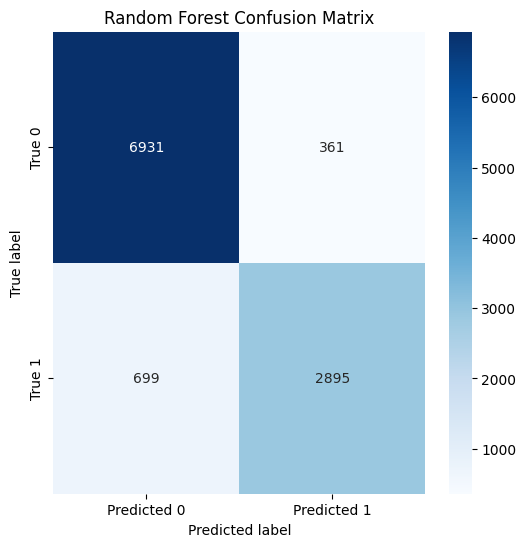

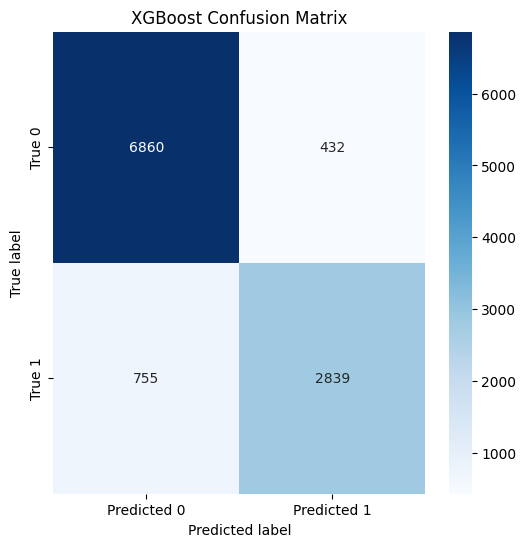

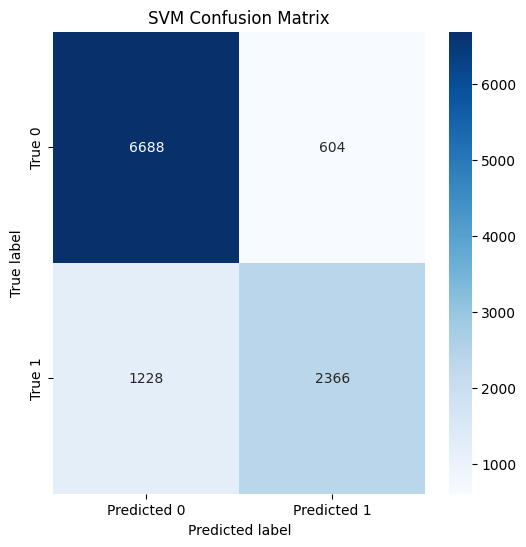

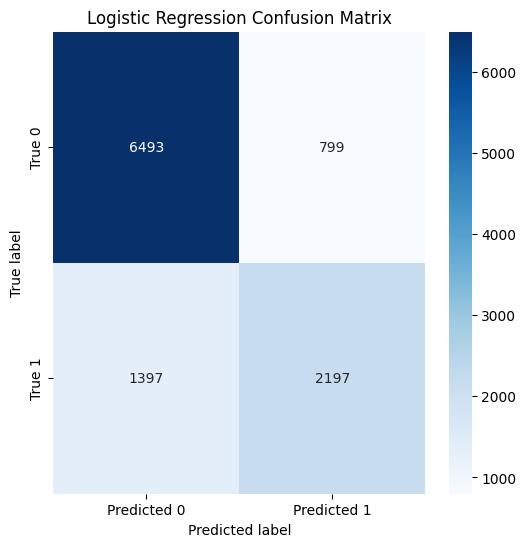

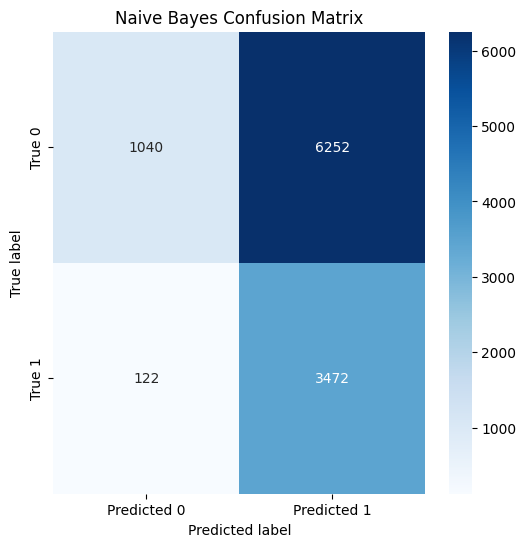

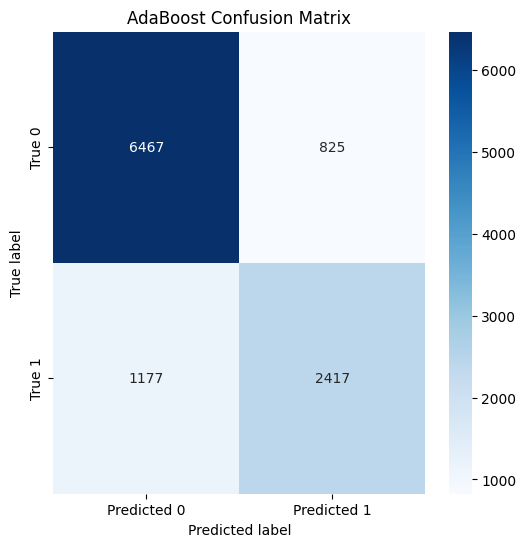

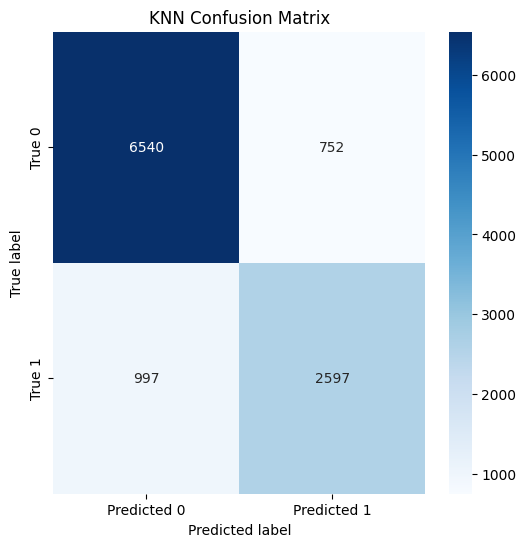

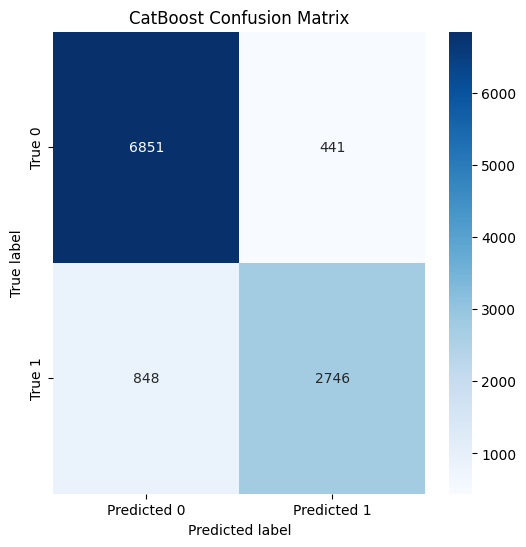

In [ ]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# ------ Random Forest ---------
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")

# ------ XGBoost ---------
plot_confusion_matrix(xgb_model, X_test, y_test, "XGBoost")

# ------- SVM -----------
plot_confusion_matrix(svm_model, X_test, y_test, "SVM")

# -------- Logistic Regression ------
plot_confusion_matrix(logreg_model, X_test, y_test, "Logistic Regression")

# -------- Naive Bayes ---------
plot_confusion_matrix(nb_model, X_test, y_test, "Naive Bayes")

# -------- AdaBoost ---------
plot_confusion_matrix(adaboost_model, X_test, y_test, "AdaBoost")

# -------- KNN ---------
plot_confusion_matrix(knn_model, X_test, y_test, "KNN")

# -------- CatBoost ---------
plot_confusion_matrix(catboost_model, X_test, y_test, "CatBoost")


<font size = 6 color = "yellow">**Gride Search**

<font color = "cyan" size = 5>**Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3, 7, 10],
    "criterion" : ["gini", "entropy", "log_loss"]
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and score for each model
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score for Random Forest: ", rf_grid_search.best_score_)




Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}
Best score for Random Forest:  0.8375971236291301


In [ ]:
best_rf_model = rf_grid_search.best_estimator_
# Predict on the test set
rf_test_predictions = best_rf_model.predict(X_test)

# Evaluate accuracy and F1-score
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Random Forest Test F1-Score: {rf_test_f1:.4f}")


Random Forest Test Accuracy: 0.9021
Random Forest Test F1-Score: 0.8446


<font color = "cyan" size = 5>**Xgboost**

In [ ]:
!pip uninstall xgboost -y
!pip install xgboost==2.1.3

Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [3, 6, 10],          # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],# Learning rate
    'subsample': [0.8, 1.0],          # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],   # Subsample ratio of columns for each tree
    'gamma': [0, 0.1, 0.2],           # Minimum loss reduction for a split
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best F1-score for XGBoost: ", xgb_grid_search.best_score_)



AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Extract the best model
best_xgb_model = xgb_grid_search.best_estimator_

# Predict and evaluate on the test set
xgb_test_predictions = best_xgb_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_f1 = f1_score(y_test, xgb_test_predictions)

print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.4f}")
print(f"XGBoost Test F1-Score: {xgb_test_f1:.4f}")

<font size = 6 color = "yellow">**Cross-validation**

<font size = 6 color = "yellow">**Ensemble Method**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create Voting Classifier (soft voting recommended for probabilistic models)
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('catboost', catboost_model), ('svm', SVC(probability=True, random_state=42))], # Initialize SVC with probability=True
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.8905934227448098


In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
import os
file_size = os.path.getsize('rf_model.pkl')
print(f"Model size: {file_size / (1024 * 1024):.2f} MB")

Model size: 107.48 MB


<font size = 6 color = "yellow">**Interpretation**

In [ ]:
rf_importances = rf_model.feature_importances_

# Create a DataFrame for Random Forest feature importances
rf_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
rf_importance_df

,Feature,Importance
7,lead time,0.307855
11,average price,0.151547
12,special requests,0.103191
15,day,0.090059
14,month,0.080381
16,total_stay_night,0.043052
3,number of week nights,0.036685
2,number of weekend nights,0.028580
23,market_segment_Online,0.026111
13,year,0.024070


<font size = 6 color = "yellow"> Save Model

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model_hotel.pkl')
